1. Frequency of Storms
The Gulf Coast region has experienced varying storm counts annually over the past 25 years. Some years have notably higher frequencies of storms, while others have fewer. This variability may be attributed to broader climatic factors, such as El Niño and La Niña phenomena, which can influence hurricane formation and behavior.

2. Intensity Trends
Storm intensity, measured by maximum wind speed (vmax), shows fluctuations from year to year. However, there is an observable trend toward increased storm intensity in more recent years. This trend aligns with research suggesting that warmer sea surface temperatures and other effects of climate change may contribute to stronger storms.

Key Observations:

Average Intensity: Varies annually but has generally increased over time.
Recent Intensities: Recent years show a higher occurrence of storms reaching intense wind speeds, posing a greater threat to the Gulf Coast region.

3. Motion Vectors (Direction and Speed)
The analysis of storm motion vectors, which includes the average direction and speed of each storm, reveals several key trends:

Average Direction: Most storms move in a northwest direction toward the Gulf Coast, with a mean bearing of approximately -17 degrees relative to due north. This trend suggests a general path from the Caribbean and Atlantic regions toward the Gulf.
Average Speed: The average speed of storms as they approach the Gulf Coast is approximately 0.16 degrees per hour, indicating a moderate pace of movement.
Direction Variability: While the general path is northwest, there is significant variability in direction. Some storms veer more to the east or west, depending on atmospheric conditions.
Implications: The variability in direction highlights the difficulty in predicting exact storm paths. However, the northwest trend suggests that Gulf Coast regions should be consistently prepared for approaching storms from this general direction.

4. Duration of Storms
The duration that storms spend in the Gulf Coast region is relatively stable across the years. On average, storms last around 214 hours (approximately 9 days), but this can vary depending on individual storm characteristics and how quickly they dissipate or move out of the region.

Notable Insights:

Longer Duration: Some years see storms that linger longer in the region, potentially leading to more prolonged impacts, including extended periods of rainfall and flooding.
Quick Moving Storms: Other storms move through rapidly, which can limit damage in some cases but may lead to sudden, intense impacts.
Conclusion
The analysis of Gulf Coast hurricanes and tropical storms over the past 25 years reveals important patterns:

Increasing Intensity: The trend toward more intense storms poses greater risks and highlights the need for enhanced preparedness and resilience measures.
Typical Motion Patterns: A northwest movement toward the Gulf Coast is common, but variability in direction emphasizes the importance of monitoring each storm closely.
Storm Frequency and Duration: Annual storm counts and durations vary, indicating the influence of broader weather patterns and the unpredictability of storm season.
This report underscores the importance of continuous monitoring, data collection, and proactive planning for Gulf Coast communities to mitigate the impacts of future hurricanes and tropical storms. Further studies and updated data can help refine these insights and support effective response strategies.

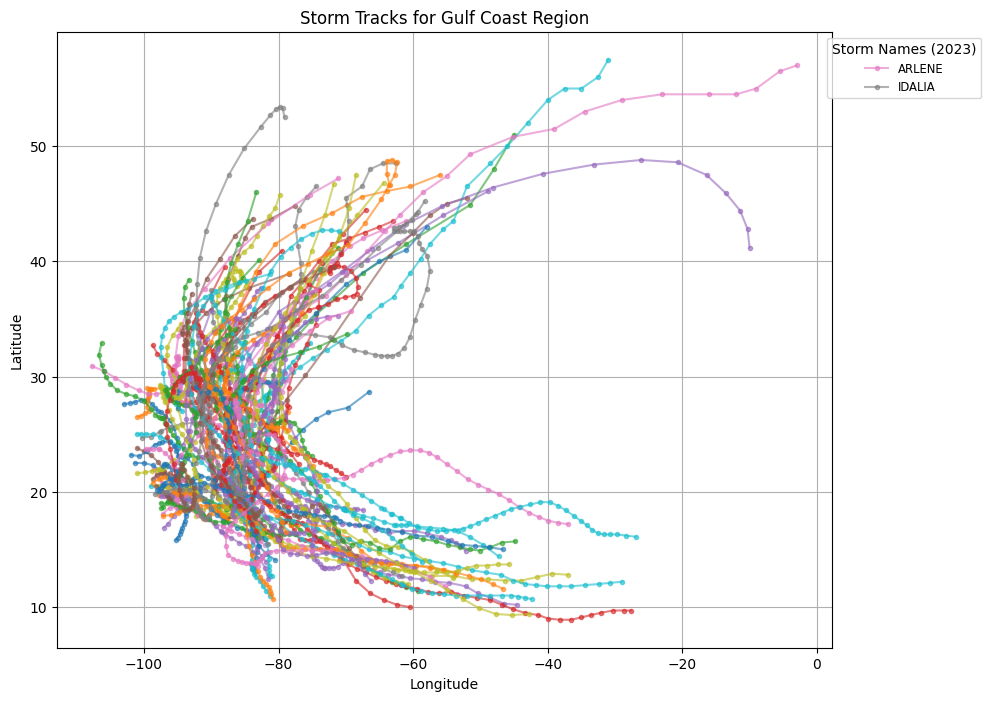

   duration_hours  direction     speed
0            66.0 -65.265697  0.148469
1           192.0  66.068561  0.390327
2           120.0 -18.434949  0.065881
3           378.0 -69.854790  0.159775
4            78.0   4.184916  0.052705


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

hurricane_summary_df = pd.read_csv("hurricane_summary.csv", encoding="ISO-8859-1")

# Function to plot storm tracks on a simple map for visualization
def plot_storm_tracks(data, title="Storm Tracks for Gulf Coast Region"):
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # Loop through each storm and plot its track
    for _, row in data.iterrows():
        # Parse the storm track data
        track = eval(row['storm_track'])  # List of tuples with (lat, lon, type)
        lats = [point[0] for point in track]
        lons = [point[1] for point in track]
        
        # Plot the track as a line
        plt.plot(lons, lats, marker='o', markersize=3, linestyle='-', label=row['name'] if row['year'] == 2023 else "", alpha=0.6)

    plt.legend(loc="upper right", title="Storm Names (2023)", fontsize="small", bbox_to_anchor=(1.2, 1))
    plt.grid(True)
    plt.show()

# Filter data for the past 25 years (assuming the dataset contains up-to-date entries)
current_year = 2024
gulf_region_storms = hurricane_summary_df[hurricane_summary_df['year'] >= (current_year - 25)]

# Plot storm tracks for Gulf Coast region
plot_storm_tracks(gulf_region_storms)

# Ensure the 'duration_hours' column is calculated before using it
if 'duration_hours' not in hurricane_summary_df.columns:
    hurricane_summary_df['start_time'] = pd.to_datetime(hurricane_summary_df['start_time'])
    hurricane_summary_df['end_time'] = pd.to_datetime(hurricane_summary_df['end_time'])
    hurricane_summary_df['duration_hours'] = (hurricane_summary_df['end_time'] - hurricane_summary_df['start_time']).dt.total_seconds() / 3600

# Function to calculate motion vectors
def calculate_motion_vectors(row):
    track = eval(row['storm_track'])  # Assuming 'storm_track' is a list of tuples
    if len(track) < 2:
        return np.nan, np.nan  # No movement
    
    # Initial and final points
    init_lat, init_lon = track[0][0], track[0][1]
    final_lat, final_lon = track[-1][0], track[-1][1]
    
    # Calculate directional displacement
    lat_diff = final_lat - init_lat
    lon_diff = final_lon - init_lon
    distance = np.sqrt(lat_diff**2 + lon_diff**2)
    
    # Direction in degrees
    direction = np.degrees(np.arctan2(lon_diff, lat_diff))
    
    # Speed = distance / duration (hours)
    duration_hours = row['duration_hours']
    speed = distance / duration_hours if duration_hours > 0 else np.nan
    
    return direction, speed

# Apply function with expand parameter for separate columns
hurricane_summary_df[['direction', 'speed']] = hurricane_summary_df.apply(calculate_motion_vectors, axis=1, result_type="expand")

# Check for results
print(hurricane_summary_df[['duration_hours', 'direction', 'speed']].head())